<a href="https://colab.research.google.com/github/SolFreire/SingleLayerPerceptronNetworkArtificialData/blob/main/SingleLayerPerceptronSigmoidActivationFunctionArtificialData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:

import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns
import copy


In [3]:
n = 50
center_circle = (2, 10)
center_triangle = (12, 10)
center_star = (7, 5)
sigma = 0.8

circle = np.random.normal(loc=center_circle, scale=sigma, size=(n, 2))
triangle = np.random.normal(loc=center_triangle, scale=sigma, size=(n, 2))
star = np.random.normal(loc=center_star, scale=sigma, size=(n, 2))

In [4]:
d_circle = np.tile([1, 0, 0], (n, 1))
d_triangle = np.tile([0, 1, 0], (n, 1))
d_star = np.tile([0, 0, 1], (n, 1))


In [5]:
X = np.vstack([circle, triangle, star])
D = np.vstack([d_circle, d_triangle, d_star])


In [6]:
dataset = pd.DataFrame({
    "x1": X[:, 0],
    "x2": X[:, 1],
    "d1": D[:, 0],
    "d2": D[:, 1],
    "d3": D[:, 2],
})

print(dataset.head())
print(dataset.shape)

         x1         x2  d1  d2  d3
0  3.051351   9.605480   1   0   0
1  3.419611  10.349301   1   0   0
2  2.515683  10.220604   1   0   0
3  2.084328  11.285701   1   0   0
4  1.692950  10.933542   1   0   0
(150, 5)


In [7]:

y_labels = np.argmax(D, axis=1)

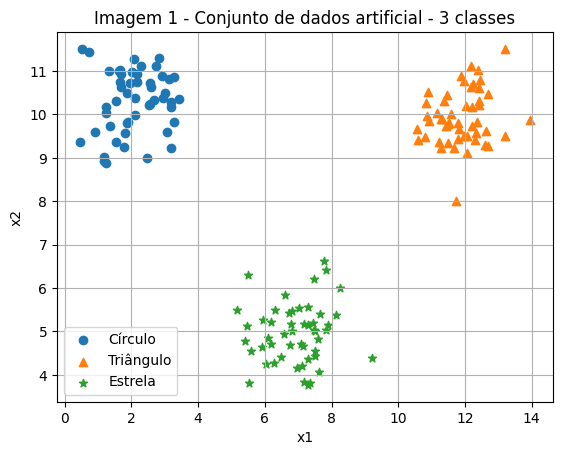

In [8]:
plt.scatter(circle[:, 0], circle[:, 1], label="Círculo", marker="o")
plt.scatter(triangle[:, 0], triangle[:, 1], label="Triângulo", marker="^")
plt.scatter(star[:, 0], star[:, 1], label="Estrela", marker="*")

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Imagem 1 - Conjunto de dados artificial - 3 classes")
plt.grid(True)
plt.show()

In [9]:
class LogisticRegressionMulticlass:
    def __init__(self, n_features, n_classes, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.n_classes = n_classes
        self.weights = torch.randn(n_classes, n_features, dtype=torch.float32)
        self.bias = torch.zeros(n_classes, dtype=torch.float32)
        self.errors_per_epoch = []

    def activation(self, z):

        return torch.sigmoid(z)

    def fit(self, X, d_onehot):
        X = torch.tensor(X, dtype=torch.float32)
        d_onehot = torch.tensor(d_onehot, dtype=torch.float32)

        for epoch in range(self.epochs):
            total_error = 0

            for xi, di in zip(X, d_onehot):

                z = torch.matmul(self.weights, xi) + self.bias
                y = torch.sigmoid(z)
                total_error += torch.sum((di - y) ** 2).item()
                grad = (y - di) * y * (1 - y)

                for j in range(self.n_classes):
                    self.weights[j] -= self.lr * grad[j] * xi
                    self.bias[j] -= self.lr * grad[j]

            self.errors_per_epoch.append(total_error)

    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        z = torch.matmul(self.weights, X.T).T + self.bias
        y = torch.sigmoid(z)
        return torch.argmax(y, dim=1).numpy()


In [10]:
class TanhClassifier:
    def __init__(self, n_features, n_classes, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.n_classes = n_classes
        self.weights = torch.randn(n_classes, n_features, dtype=torch.float32)
        self.bias = torch.zeros(n_classes, dtype=torch.float32)
        self.errors_per_epoch = []

    def activation(self, z):
        return torch.tanh(z)

    def fit(self, X, d_onehot):

        X = torch.tensor(X, dtype=torch.float32)
        d_onehot = torch.tensor(d_onehot, dtype=torch.float32)

        for epoch in range(self.epochs):
            total_error = 0.0

            for xi, di in zip(X, d_onehot):
                z = torch.matmul(self.weights, xi) + self.bias
                y = torch.tanh(z)
                total_error += torch.sum((di - y) ** 2).item()
                grad = (y - di) * (1 - y ** 2)


                for j in range(self.n_classes):
                    self.weights[j] -= self.lr * grad[j] * xi
                    self.bias[j] -= self.lr * grad[j]

            self.errors_per_epoch.append(total_error)

    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        z = torch.matmul(self.weights, X.T).T + self.bias
        y = torch.tanh(z)
        return torch.argmax(y, dim=1).numpy()


Realização 1: Acurácia Regressão Logística= 0.3333, Acurácia Tangente Hiperbólica= 0.0000
Realização 2: Acurácia Regressão Logística= 0.3333, Acurácia Tangente Hiperbólica= 1.0000
Realização 3: Acurácia Regressão Logística= 0.3333, Acurácia Tangente Hiperbólica= 0.3333
Realização 4: Acurácia Regressão Logística= 0.8000, Acurácia Tangente Hiperbólica= 0.1333
Realização 5: Acurácia Regressão Logística= 0.6667, Acurácia Tangente Hiperbólica= 0.3333
Realização 6: Acurácia Regressão Logística= 0.3333, Acurácia Tangente Hiperbólica= 0.3333
Realização 7: Acurácia Regressão Logística= 0.6667, Acurácia Tangente Hiperbólica= 0.6667
Realização 8: Acurácia Regressão Logística= 0.3333, Acurácia Tangente Hiperbólica= 0.3333
Realização 9: Acurácia Regressão Logística= 0.3333, Acurácia Tangente Hiperbólica= 0.3333
Realização 10: Acurácia Regressão Logística= 0.6667, Acurácia Tangente Hiperbólica= 0.6667
Realização 11: Acurácia Regressão Logística= 0.9333, Acurácia Tangente Hiperbólica= 0.4000
Realizaç

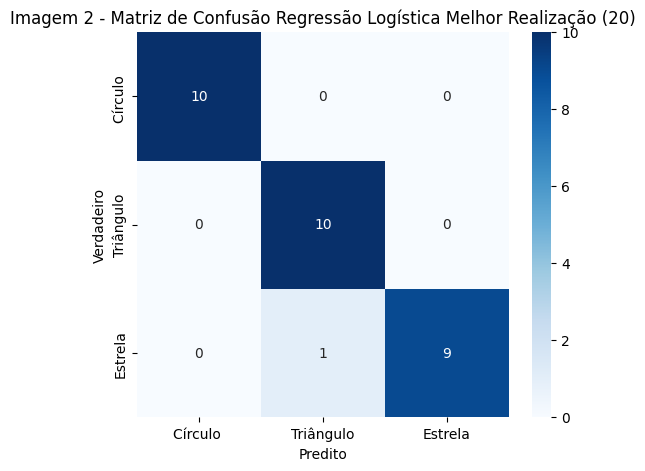

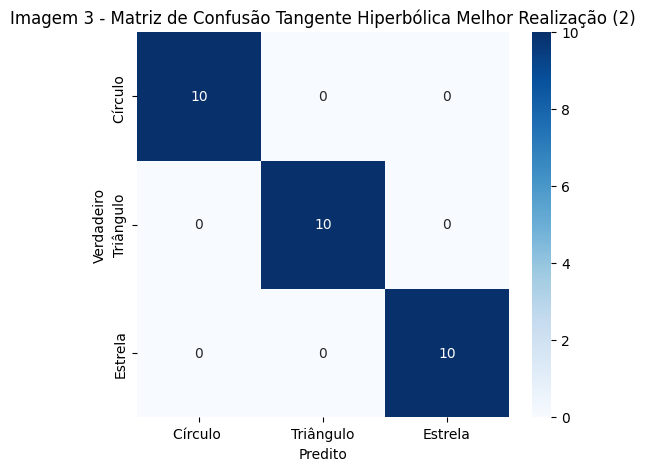

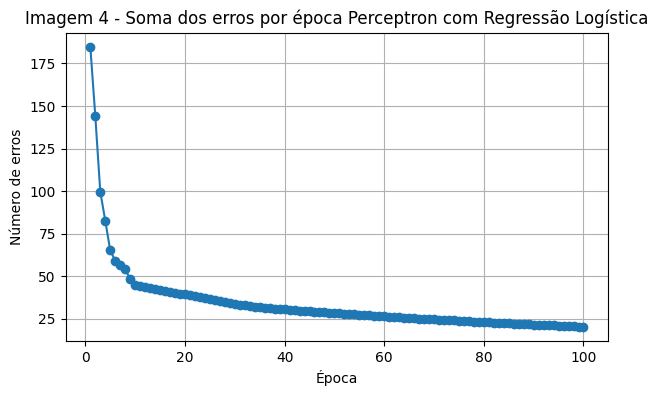

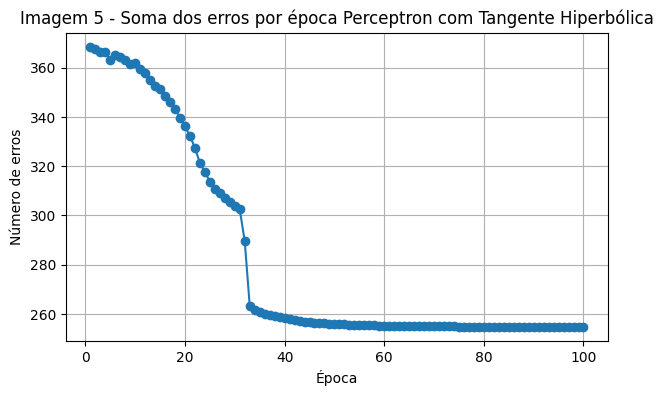

In [26]:
class_names = ["Círculo ", "Triângulo", "Estrela"]
accuracies1 = []
accuracies2 = []
conf_matrices1 = []
conf_matrices2 = []
models1 = []
models2 = []
splits = []

for run in range(20):
    X_train, X_test, d_train, d_test, y_train, y_test = train_test_split(
    X, D, y_labels, test_size=0.2, random_state=42, stratify=y_labels
    )
    model1 = LogisticRegressionMulticlass( 2, 3, lr=0.01, epochs=100)
    model2 = TanhClassifier( 2, 3, lr=0.01, epochs=100)
    model1.fit(X_train, d_train)
    model2.fit(X_train, d_train)
    models1.append(copy.deepcopy(model1))
    models2.append(copy.deepcopy(model2))
    splits.append((X_train, X_test, y_train, y_test))
    y_pred1 = model1.predict(X_test)
    y_pred2 = model2.predict(X_test)

    acc1 = accuracy_score(y_test, y_pred1)
    acc2 = accuracy_score(y_test, y_pred2)
    accuracies1.append(acc1)
    accuracies2.append(acc2)
    conf_matrices1.append(confusion_matrix(y_test, y_pred1))
    conf_matrices2.append(confusion_matrix(y_test, y_pred2))

    print(f"Realização {run+1}: Acurácia Regressão Logística= {acc1:.4f}, Acurácia Tangente Hiperbólica= {acc2:.4f}")

mean_acc1 = np.mean(accuracies1)
mean_acc2 = np.mean(accuracies2)
std_acc1 = np.std(accuracies1)
std_acc2 = np.std(accuracies2)
best_run1 = np.argmax(accuracies1)
best_run2 = np.argmax(accuracies2)
best_model1 = models1[best_run1]
best_model2 = models2[best_run2]

Xtr1, Xte1, ytr1, yte1 = splits[best_run1]
Xtr2, Xte2, ytr2, yte2 = splits[best_run2]

print("\n Resultados gerais Regressão Logística:")
print(f"Acurácia média: {mean_acc1:.4f}")
print(f"Desvio padrão:  {std_acc1:.4f}")
print(f"Melhor realização: {best_run1+1} (Acurácia = {accuracies1[best_run1]:.4f})")

print("\n Resultados gerais Tangente Hiperbolica:")
print(f"Acurácia média: {mean_acc2:.4f}")
print(f"Desvio padrão:  {std_acc2:.4f}")
print(f"Melhor realização: {best_run2+1} (Acurácia = {accuracies2[best_run2]:.4f})")

best_conf1 = conf_matrices1[best_run1]
best_conf2 = conf_matrices2[best_run2]

plt.figure(figsize=(6, 5))
sns.heatmap(best_conf1, annot=True, fmt="d", cmap="Blues",
            xticklabels= class_names,
            yticklabels=class_names)
plt.title(f"Imagem 2 - Matriz de Confusão Regressão Logística Melhor Realização ({best_run1+1})")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(best_conf2, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title(f"Imagem 3 - Matriz de Confusão Tangente Hiperbólica Melhor Realização ({best_run2+1})")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()


plt.figure(figsize=(7, 4))
plt.plot(range(1, len(model1.errors_per_epoch)+1), model1.errors_per_epoch, marker='o')
plt.title("Imagem 4 - Soma dos erros por época Perceptron com Regressão Logística")
plt.xlabel("Época")
plt.ylabel("Número de erros")
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(range(1, len(model2.errors_per_epoch)+1), model2.errors_per_epoch, marker='o')
plt.title("Imagem 5 - Soma dos erros por época Perceptron com Tangente Hiperbólica")
plt.xlabel("Época")
plt.ylabel("Número de erros")
plt.grid(True)
plt.show()

In [25]:
def plot_decision_surface(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()


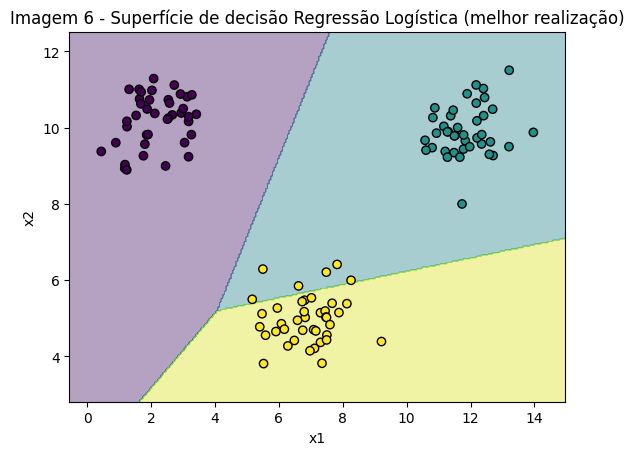

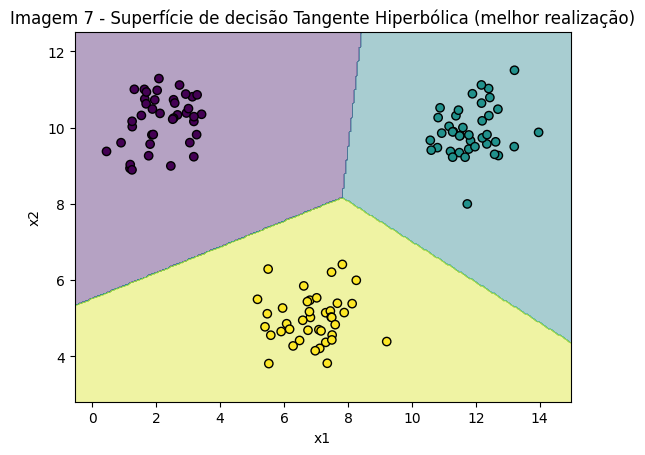

In [28]:
plot_decision_surface(
    best_model1,
    Xtr1,
    ytr1,
    "Imagem 6 - Superfície de decisão Regressão Logística (melhor realização)"
)

plot_decision_surface(
    best_model2,
    Xtr2,
    ytr2,
    "Imagem 7 - Superfície de decisão Tangente Hiperbólica (melhor realização)"
)